This contains the code with SVM SVC classifier trained on the group data with multiple images of each celebrity. Classifier built on top of the encodings derived from train images.


In [1]:
# Installing face recognition library for python
!pip install face_recognition Scikit-learn dlib docopt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing all the necessary libraries in one go
from os import listdir
import face_recognition
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
import pickle


from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
#from IPython.display import Image
from keras.preprocessing import image
from sklearn import svm

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


Using TensorFlow backend.


In [0]:
# This function returns the name for the employees recognized
def getNameByFace(filePath):

  test_image = face_recognition.load_image_file(filePath)
  face_bounding_boxes = face_recognition.face_locations(test_image)
  # If training image contains exactly one face 
  if len(face_bounding_boxes) == 1: 
    test_image_enc = face_recognition.face_encodings(test_image, num_jitters=100)[0] 
                # Add face encoding for current image  
                # with corresponding label (name) to the training data 
    name = face_recog_model.predict([test_image_enc])

    results = face_recog_model.predict_proba([test_image_enc])[0]
     #gets a dictionary of {'class_name': probability}
    prob_per_class_dictionary = dict(zip(face_recog_model.classes_, results))
    print(prob_per_class_dictionary)
    res = str(name)[2:-2] 


    return res
  else: 
    print("Test image is not valid !!")
    return "Invalid Image"

  
  



In [0]:
# Function to return the expression
def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [0]:
# Function to get the emotion from the image
def getEmotionFromFace(filePath) :
  
  test_input_img=cv2.imread(filePath)
  test_img_data_list=[]
  test_input_img_resize=cv2.resize(test_input_img,(48,48))
  test_img_data_list.append(test_input_img_resize)

  test_img_data_list = np.array(test_img_data_list)
  test_img_data_list = test_img_data_list.astype('float32')
  test_img_data_list = test_img_data_list/255
  test_img_data_list.shape
  converted_test_image = test_img_data_list[0:1]

  test_res = loaded_model.predict_classes(converted_test_image)
  print(test_res)
  return getLabel(test_res[0])

In [0]:
# This function will return the labels for face recognition and emotion detection
# This function will print the images with the labels identified for the test images

def testModel(filePath) :
  
  employee, extension = filePath.split(".")
  #test_emp_name.append(employee)
  emotion = getEmotionFromFace(filePath)
  name = getNameByFace(filePath) 
  final_names.append(name)
  plt.figure(figsize=(10, 10))

  test_input_img=cv2.imread(filePath)
  test_img_data_list=[]
  test_input_img_resize=cv2.resize(test_input_img,(160,160))
  test_img_data_list.append(test_input_img_resize)

  test_img_data_list = np.array(test_img_data_list)
  test_img_data_list = test_img_data_list.astype('float32')
  test_img_data_list = test_img_data_list/255
  test_img_data_list.shape
  converted_test_image = test_img_data_list[0:1]

  for i in range(0, 1):
      plt.subplot(330 + 1 + i)
      plt.imshow(converted_test_image[i],cmap=plt.get_cmap('gray'))
      plt.gca().get_xaxis().set_ticks([])
      plt.gca().get_yaxis().set_ticks([])
      plt.ylabel('Emotion = %s' % emotion, fontsize=14)
      plt.xlabel('Recognized as  = %s' % name, fontsize=14)
  # show the plot
  plt.show()

In [0]:
def metrices_report():
  print(confusion_matrix(result['Label'], y_data['y_predict']))
  
  precision = precision_score(result['Label'], y_data['y_predict'], average='macro')
  print("Precision: %f" % precision)

  recall = recall_score(result['Label'], y_data['y_predict'], average='macro')
  print('Recall: %f' % recall)


# f1: 2 tp / (2 tp + fp + fn)
  f1 = f1_score(result['Label'], y_data['y_predict'], average='macro')
  print('F1 Score: %f' %f1)

  print(classification_report(result['Label'], y_data['y_predict']))

[6]
{'Aamir Khan': 0.014961370860612506, 'Ajay Devgan': 0.01223951135038487, 'Akshay': 0.008774468116667317, 'Amitabh': 0.011242737235538876, 'Anjelina Jolie': 0.08782651621641185, 'Arjun Rampal': 0.010538454231309854, 'Ayushman': 0.013509285103196569, 'Ben Affleck': 0.010144138491848776, 'Brad Pitt': 0.005545828638514019, 'Chris Evans': 0.0052574723997316185, 'Chris Hemsworth': 0.004485964523717055, 'Disha Patani': 0.035979782180337094, 'Elton John': 0.01704344396588126, 'Emilia Clarke': 0.021909635642383896, 'Hrithik Roshan': 0.009581695528771706, 'Irrfan Khan': 0.020793205180937212, 'Jacqueline Fernandis': 0.026401891189430673, 'Jerry Seinfeld': 0.010323752676180714, 'John Abraham': 0.014754861619014714, 'Justin': 0.005692073338705161, 'Kajol': 0.03533126034320263, 'Kareena': 0.024069719720044847, 'Karishma': 0.021059247535893656, 'Katrina': 0.050037266126894304, 'Keanu Reeves': 0.011198937432083488, 'Kit Harrington': 0.00945488984901269, 'Madhuri': 0.0236470015168259, 'Madonna': 0.

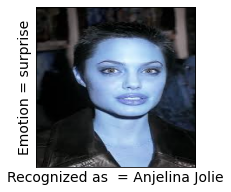

[5]
{'Aamir Khan': 0.016749391526059868, 'Ajay Devgan': 0.012041356031607536, 'Akshay': 0.010543731313209695, 'Amitabh': 0.01314318470486965, 'Anjelina Jolie': 0.08497505162146012, 'Arjun Rampal': 0.011267909251175177, 'Ayushman': 0.01504392720834132, 'Ben Affleck': 0.017950415549437434, 'Brad Pitt': 0.006552919882674497, 'Chris Evans': 0.0077148130540413635, 'Chris Hemsworth': 0.005708445787847943, 'Disha Patani': 0.02865391584650251, 'Elton John': 0.018024593995260248, 'Emilia Clarke': 0.025481983096512135, 'Hrithik Roshan': 0.011258664861701882, 'Irrfan Khan': 0.02023683449449563, 'Jacqueline Fernandis': 0.01627654335806545, 'Jerry Seinfeld': 0.014767570604420122, 'John Abraham': 0.015190071887450918, 'Justin': 0.005228395941042512, 'Kajol': 0.02098111898166135, 'Kareena': 0.027260685863398144, 'Karishma': 0.030360480242304855, 'Katrina': 0.05329866073483797, 'Keanu Reeves': 0.014433252703931141, 'Kit Harrington': 0.010202152872388064, 'Madhuri': 0.023992116262782817, 'Madonna': 0.0

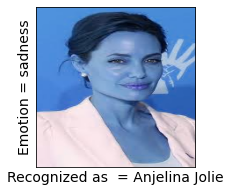

[6]
{'Aamir Khan': 0.016130500434809417, 'Ajay Devgan': 0.027866140476694452, 'Akshay': 0.03807351182349198, 'Amitabh': 0.027408345774596797, 'Anjelina Jolie': 0.007561721687234297, 'Arjun Rampal': 0.03528944049173478, 'Ayushman': 0.03850753553945866, 'Ben Affleck': 0.008486050105533103, 'Brad Pitt': 0.0057974020860777535, 'Chris Evans': 0.007688060995855722, 'Chris Hemsworth': 0.006347793975209478, 'Disha Patani': 0.008696714778555985, 'Elton John': 0.017931536178703078, 'Emilia Clarke': 0.0071711200065748115, 'Hrithik Roshan': 0.05750988728811812, 'Irrfan Khan': 0.027383379572313682, 'Jacqueline Fernandis': 0.004623686076003248, 'Jerry Seinfeld': 0.023740733908594002, 'John Abraham': 0.02226453275249935, 'Justin': 0.009122676336154446, 'Kajol': 0.007332961043408862, 'Kareena': 0.012225800121356148, 'Karishma': 0.009967098347093447, 'Katrina': 0.020984724135970186, 'Keanu Reeves': 0.008212032297296218, 'Kit Harrington': 0.009092478675663079, 'Madhuri': 0.0072599825030550125, 'Madonna'

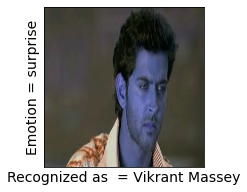

[0]
{'Aamir Khan': 0.009884500428905681, 'Ajay Devgan': 0.01216853858126661, 'Akshay': 0.009785234927730984, 'Amitabh': 0.022334629515050105, 'Anjelina Jolie': 0.0178349022943954, 'Arjun Rampal': 0.010381775911747226, 'Ayushman': 0.0181457171327962, 'Ben Affleck': 0.004058495044079153, 'Brad Pitt': 0.004612551329101042, 'Chris Evans': 0.005104729291692003, 'Chris Hemsworth': 0.005348815372549712, 'Disha Patani': 0.06884939637411236, 'Elton John': 0.012329811499316659, 'Emilia Clarke': 0.02087541396914331, 'Hrithik Roshan': 0.011889977559757207, 'Irrfan Khan': 0.011992664266082816, 'Jacqueline Fernandis': 0.00814446429557732, 'Jerry Seinfeld': 0.010371848180197362, 'John Abraham': 0.007451622462236411, 'Justin': 0.005238955364997192, 'Kajol': 0.014940949873948476, 'Kareena': 0.0841853902034941, 'Karishma': 0.04205781620418988, 'Katrina': 0.042450785081305724, 'Keanu Reeves': 0.009268989173086262, 'Kit Harrington': 0.006550048863870574, 'Madhuri': 0.04133023220759963, 'Madonna': 0.017437

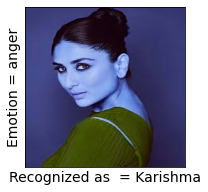

[6]
{'Aamir Khan': 0.008455388514790618, 'Ajay Devgan': 0.011783331462905952, 'Akshay': 0.00916441558435873, 'Amitabh': 0.027590965484864505, 'Anjelina Jolie': 0.019750423014594908, 'Arjun Rampal': 0.010493367648471981, 'Ayushman': 0.016003233089843433, 'Ben Affleck': 0.004299088545637378, 'Brad Pitt': 0.005628628273128263, 'Chris Evans': 0.004910371335066139, 'Chris Hemsworth': 0.005168225325993608, 'Disha Patani': 0.05076255890062683, 'Elton John': 0.01586744124810622, 'Emilia Clarke': 0.017687329523961313, 'Hrithik Roshan': 0.010114360296068601, 'Irrfan Khan': 0.012076594966701472, 'Jacqueline Fernandis': 0.012828001672902937, 'Jerry Seinfeld': 0.0112861989451122, 'John Abraham': 0.006875098561080248, 'Justin': 0.005387264740085929, 'Kajol': 0.01581358296666363, 'Kareena': 0.07896750298389044, 'Karishma': 0.0433532879026356, 'Katrina': 0.049702473201290176, 'Keanu Reeves': 0.00961284684896811, 'Kit Harrington': 0.00762418476866868, 'Madhuri': 0.03029472281281985, 'Madonna': 0.014372

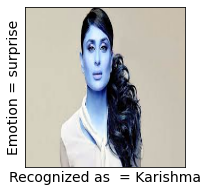

[6]
{'Aamir Khan': 0.0268578100961289, 'Ajay Devgan': 0.08593906572693207, 'Akshay': 0.01761977068245041, 'Amitabh': 0.019083172895688342, 'Anjelina Jolie': 0.008909444218408486, 'Arjun Rampal': 0.02223606272631464, 'Ayushman': 0.01964838332631803, 'Ben Affleck': 0.006620404431080915, 'Brad Pitt': 0.0063788057013584335, 'Chris Evans': 0.004564751120081948, 'Chris Hemsworth': 0.004770097046446633, 'Disha Patani': 0.01026245978044904, 'Elton John': 0.0291770027489685, 'Emilia Clarke': 0.007229279756820082, 'Hrithik Roshan': 0.0144413310950573, 'Irrfan Khan': 0.0357197191595486, 'Jacqueline Fernandis': 0.004207428353298869, 'Jerry Seinfeld': 0.013944851032420569, 'John Abraham': 0.02637364324137477, 'Justin': 0.005338905117566129, 'Kajol': 0.009328797753302961, 'Kareena': 0.010828598693673301, 'Karishma': 0.010222146801805065, 'Katrina': 0.016642278627727373, 'Keanu Reeves': 0.014599179856198389, 'Kit Harrington': 0.013464167422071382, 'Madhuri': 0.009339795714666683, 'Madonna': 0.0079421

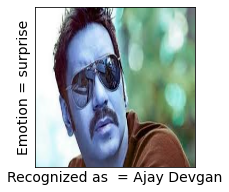

[5]
{'Aamir Khan': 0.030786625186463083, 'Ajay Devgan': 0.14256120592440225, 'Akshay': 0.019456331087854998, 'Amitabh': 0.0189186701622305, 'Anjelina Jolie': 0.005950595813919027, 'Arjun Rampal': 0.027724370797635036, 'Ayushman': 0.02237716798350277, 'Ben Affleck': 0.004826533176743311, 'Brad Pitt': 0.0060747236767250525, 'Chris Evans': 0.00449909427228575, 'Chris Hemsworth': 0.00429051409853421, 'Disha Patani': 0.00846258635503735, 'Elton John': 0.018236175236147015, 'Emilia Clarke': 0.007183167615680548, 'Hrithik Roshan': 0.01925341157194214, 'Irrfan Khan': 0.04234205417021918, 'Jacqueline Fernandis': 0.003389633876160808, 'Jerry Seinfeld': 0.01568842477720248, 'John Abraham': 0.022205329417313596, 'Justin': 0.006114009256389932, 'Kajol': 0.008977026364937496, 'Kareena': 0.010290915425239322, 'Karishma': 0.009705496654536279, 'Katrina': 0.012703477706457167, 'Keanu Reeves': 0.009683358867711196, 'Kit Harrington': 0.007864770038630176, 'Madhuri': 0.008964870949030253, 'Madonna': 0.006

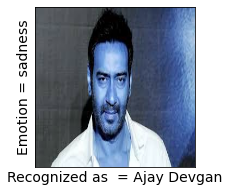

[5]
{'Aamir Khan': 0.02340474029586153, 'Ajay Devgan': 0.02085557360546437, 'Akshay': 0.026624713913181396, 'Amitabh': 0.03532185494486204, 'Anjelina Jolie': 0.00617745058095248, 'Arjun Rampal': 0.03904720388811992, 'Ayushman': 0.03869016008818032, 'Ben Affleck': 0.010130252736977726, 'Brad Pitt': 0.004745896585151551, 'Chris Evans': 0.011809190269850594, 'Chris Hemsworth': 0.007627849442872836, 'Disha Patani': 0.007565200273574503, 'Elton John': 0.03387508901071818, 'Emilia Clarke': 0.006302790866607835, 'Hrithik Roshan': 0.05426153795430956, 'Irrfan Khan': 0.025344474201163068, 'Jacqueline Fernandis': 0.004880197773649161, 'Jerry Seinfeld': 0.04069962168417006, 'John Abraham': 0.030711942970657803, 'Justin': 0.006258008704808822, 'Kajol': 0.004416463827397738, 'Kareena': 0.01374928009366722, 'Karishma': 0.010150395002654175, 'Katrina': 0.020380105442827725, 'Keanu Reeves': 0.011739068352871617, 'Kit Harrington': 0.008148598397276082, 'Madhuri': 0.007437630271852242, 'Madonna': 0.0086

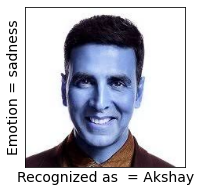

[0]
{'Aamir Khan': 0.015148532865915349, 'Ajay Devgan': 0.017709740285067027, 'Akshay': 0.02373748753951505, 'Amitabh': 0.06416557121478877, 'Anjelina Jolie': 0.017322540779207515, 'Arjun Rampal': 0.018353727431235825, 'Ayushman': 0.024344868542210525, 'Ben Affleck': 0.011360251338542718, 'Brad Pitt': 0.0076521472652299775, 'Chris Evans': 0.008608363077332771, 'Chris Hemsworth': 0.006916354312462042, 'Disha Patani': 0.020479817214247558, 'Elton John': 0.03394119336020816, 'Emilia Clarke': 0.01626536992887342, 'Hrithik Roshan': 0.0245323867066453, 'Irrfan Khan': 0.016255493777264443, 'Jacqueline Fernandis': 0.009015520273898918, 'Jerry Seinfeld': 0.02885909238900039, 'John Abraham': 0.010376432981723185, 'Justin': 0.00851644127845786, 'Kajol': 0.012615081113573099, 'Kareena': 0.04835619417649479, 'Karishma': 0.03009150797041571, 'Katrina': 0.03664290852746585, 'Keanu Reeves': 0.019821416972119338, 'Kit Harrington': 0.014323473374597842, 'Madhuri': 0.011734719226640863, 'Madonna': 0.0187

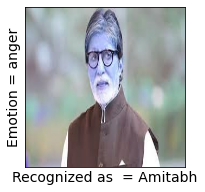

[5]
{'Aamir Khan': 0.011310439476207955, 'Ajay Devgan': 0.01218211467000109, 'Akshay': 0.014028392811268582, 'Amitabh': 0.021261940748612578, 'Anjelina Jolie': 0.03172644406283767, 'Arjun Rampal': 0.01113606143244969, 'Ayushman': 0.020856003347736726, 'Ben Affleck': 0.004970130267597707, 'Brad Pitt': 0.005284512420989512, 'Chris Evans': 0.005236827285565072, 'Chris Hemsworth': 0.005643777570634206, 'Disha Patani': 0.04601135735834926, 'Elton John': 0.01778878923147271, 'Emilia Clarke': 0.010544812436729452, 'Hrithik Roshan': 0.013663956907358284, 'Irrfan Khan': 0.011974100795600686, 'Jacqueline Fernandis': 0.02806615691890852, 'Jerry Seinfeld': 0.01566162183480319, 'John Abraham': 0.0108876120758691, 'Justin': 0.0042368289450681025, 'Kajol': 0.021512181398316177, 'Kareena': 0.056748551768979416, 'Karishma': 0.03690249723792851, 'Katrina': 0.08945639335508272, 'Keanu Reeves': 0.010288483725370043, 'Kit Harrington': 0.008593356579695986, 'Madhuri': 0.022773966736747732, 'Madonna': 0.0303

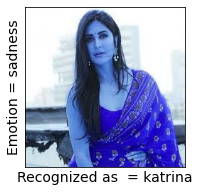

[6]
{'Aamir Khan': 0.00977642068326698, 'Ajay Devgan': 0.009947733070925328, 'Akshay': 0.01066199865153787, 'Amitabh': 0.01079306116522696, 'Anjelina Jolie': 0.026792343963230002, 'Arjun Rampal': 0.009633582849195375, 'Ayushman': 0.010803631390231248, 'Ben Affleck': 0.00485966487070316, 'Brad Pitt': 0.003367236226521489, 'Chris Evans': 0.004227532666739731, 'Chris Hemsworth': 0.004442758211099999, 'Disha Patani': 0.03224935141910731, 'Elton John': 0.009702504341105525, 'Emilia Clarke': 0.016154749230581186, 'Hrithik Roshan': 0.011881258887383039, 'Irrfan Khan': 0.013696955809909319, 'Jacqueline Fernandis': 0.007564388225613589, 'Jerry Seinfeld': 0.006510181290705025, 'John Abraham': 0.01277838634400831, 'Justin': 0.005785650046633388, 'Kajol': 0.008133667154169473, 'Kareena': 0.039330406092089654, 'Karishma': 0.03277096452348061, 'Katrina': 0.0419325295535867, 'Keanu Reeves': 0.010070148848479156, 'Kit Harrington': 0.0070676662803509736, 'Madhuri': 0.2915068463282382, 'Madonna': 0.0276

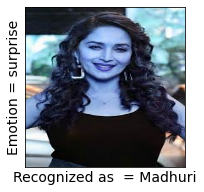

[2]
{'Aamir Khan': 0.010382992810250593, 'Ajay Devgan': 0.007748237209059647, 'Akshay': 0.006522834157302285, 'Amitabh': 0.009479236494682611, 'Anjelina Jolie': 0.021807427404951514, 'Arjun Rampal': 0.009249307286056914, 'Ayushman': 0.013526621404604481, 'Ben Affleck': 0.0027963799673373256, 'Brad Pitt': 0.0030676129105573473, 'Chris Evans': 0.002967109135040182, 'Chris Hemsworth': 0.0026800131689929973, 'Disha Patani': 0.030301274440914787, 'Elton John': 0.009707294471736546, 'Emilia Clarke': 0.00988205277267542, 'Hrithik Roshan': 0.006259187651238041, 'Irrfan Khan': 0.011911109801496919, 'Jacqueline Fernandis': 0.012214833359962771, 'Jerry Seinfeld': 0.004156642654321596, 'John Abraham': 0.00903618957212729, 'Justin': 0.005180393779986782, 'Kajol': 0.032036478373867694, 'Kareena': 0.026036449760021504, 'Karishma': 0.020684822373957263, 'Katrina': 0.03370409150330551, 'Keanu Reeves': 0.005061574197136112, 'Kit Harrington': 0.006235960250568352, 'Madhuri': 0.04931327405552501, 'Madonna

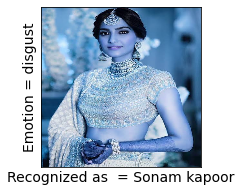

[0]
{'Aamir Khan': 0.007391744953483163, 'Ajay Devgan': 0.011415531088413167, 'Akshay': 0.013588630842031123, 'Amitabh': 0.017955503667038294, 'Anjelina Jolie': 0.019296071939562575, 'Arjun Rampal': 0.010179670712438442, 'Ayushman': 0.01795545782561627, 'Ben Affleck': 0.006053713845325911, 'Brad Pitt': 0.0052141167874638255, 'Chris Evans': 0.008114970552102621, 'Chris Hemsworth': 0.007094758549733056, 'Disha Patani': 0.05384378565639494, 'Elton John': 0.01656596756145821, 'Emilia Clarke': 0.012356738254693663, 'Hrithik Roshan': 0.013629603136637499, 'Irrfan Khan': 0.010436725994481248, 'Jacqueline Fernandis': 0.017868086148068566, 'Jerry Seinfeld': 0.012524058204771203, 'John Abraham': 0.00895265098954651, 'Justin': 0.005405946231885813, 'Kajol': 0.015437727962075983, 'Kareena': 0.06578969630976655, 'Karishma': 0.040889856159998426, 'Katrina': 0.09244229504109916, 'Keanu Reeves': 0.01226862619464175, 'Kit Harrington': 0.0096847998863373, 'Madhuri': 0.03452782743705495, 'Madonna': 0.021

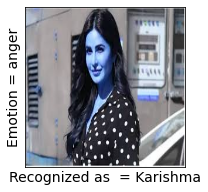

[6]
{'Aamir Khan': 0.01443266480893755, 'Ajay Devgan': 0.020256115052496512, 'Akshay': 0.027406592096368233, 'Amitabh': 0.030196972317442304, 'Anjelina Jolie': 0.006650050923911443, 'Arjun Rampal': 0.04099223285854437, 'Ayushman': 0.02742152321685796, 'Ben Affleck': 0.009591950820870807, 'Brad Pitt': 0.006038148606366375, 'Chris Evans': 0.009774721075252344, 'Chris Hemsworth': 0.008580811344358287, 'Disha Patani': 0.008480023159560379, 'Elton John': 0.038429499491244634, 'Emilia Clarke': 0.007028943028736602, 'Hrithik Roshan': 0.04304466996644909, 'Irrfan Khan': 0.03005625344868124, 'Jacqueline Fernandis': 0.004931704244896668, 'Jerry Seinfeld': 0.0419636167511453, 'John Abraham': 0.034110176964245065, 'Justin': 0.005821577116120978, 'Kajol': 0.006685445096026183, 'Kareena': 0.011340077173040532, 'Karishma': 0.010452144957269479, 'Katrina': 0.017620377807921455, 'Keanu Reeves': 0.008710056810401231, 'Kit Harrington': 0.009383672949846, 'Madhuri': 0.008755914358518234, 'Madonna': 0.0082

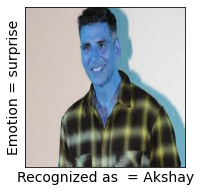

[0]
{'Aamir Khan': 0.02179115467617329, 'Ajay Devgan': 0.024944376309495316, 'Akshay': 0.02797046869616938, 'Amitabh': 0.021626887010426386, 'Anjelina Jolie': 0.008261215950510995, 'Arjun Rampal': 0.045275866089296075, 'Ayushman': 0.02495185480671222, 'Ben Affleck': 0.009081804632703645, 'Brad Pitt': 0.005813383816458424, 'Chris Evans': 0.009948321413602215, 'Chris Hemsworth': 0.00939297992687935, 'Disha Patani': 0.006333633829094765, 'Elton John': 0.04508428507492281, 'Emilia Clarke': 0.008248892772144745, 'Hrithik Roshan': 0.04822362518058673, 'Irrfan Khan': 0.02645411786403142, 'Jacqueline Fernandis': 0.0057662491427747705, 'Jerry Seinfeld': 0.02596735911097838, 'John Abraham': 0.04291854194669403, 'Justin': 0.007116625804012382, 'Kajol': 0.005860952577135049, 'Kareena': 0.008608380528308868, 'Karishma': 0.008512766447704555, 'Katrina': 0.016531013416119716, 'Keanu Reeves': 0.007845364577538181, 'Kit Harrington': 0.009342121718639691, 'Madhuri': 0.008829240290314658, 'Madonna': 0.01

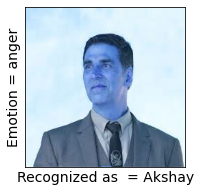

[0]
{'Aamir Khan': 0.03756079931111412, 'Ajay Devgan': 0.02187171992072914, 'Akshay': 0.030052179255970073, 'Amitabh': 0.025538036606376387, 'Anjelina Jolie': 0.007982145791797733, 'Arjun Rampal': 0.0386622567397088, 'Ayushman': 0.04066292944366093, 'Ben Affleck': 0.013554774779404463, 'Brad Pitt': 0.00427131773323669, 'Chris Evans': 0.011579159542936352, 'Chris Hemsworth': 0.007269483854077891, 'Disha Patani': 0.008175686456390021, 'Elton John': 0.03191945069634229, 'Emilia Clarke': 0.007479977403621381, 'Hrithik Roshan': 0.05684629875138027, 'Irrfan Khan': 0.021019430327537454, 'Jacqueline Fernandis': 0.004900516459359386, 'Jerry Seinfeld': 0.032818510682835166, 'John Abraham': 0.03602143657157948, 'Justin': 0.0061237060101124174, 'Kajol': 0.0045906105334252295, 'Kareena': 0.012785829974718074, 'Karishma': 0.011178206808449297, 'Katrina': 0.02537083384752258, 'Keanu Reeves': 0.011079691692682084, 'Kit Harrington': 0.008207340925166678, 'Madhuri': 0.008356898020200933, 'Madonna': 0.01

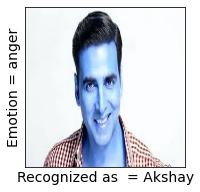

[4]
{'Aamir Khan': 0.01436414558297098, 'Ajay Devgan': 0.01872128228972725, 'Akshay': 0.041317108965446235, 'Amitabh': 0.019445195135749098, 'Anjelina Jolie': 0.00695194684668645, 'Arjun Rampal': 0.03402463672001174, 'Ayushman': 0.021870128701449238, 'Ben Affleck': 0.011075785438879274, 'Brad Pitt': 0.006641167731600219, 'Chris Evans': 0.008041357180927968, 'Chris Hemsworth': 0.007894250458735649, 'Disha Patani': 0.008043368110962354, 'Elton John': 0.024066388524095955, 'Emilia Clarke': 0.008132945844993975, 'Hrithik Roshan': 0.05370248308010464, 'Irrfan Khan': 0.0259029393858422, 'Jacqueline Fernandis': 0.004204529796780262, 'Jerry Seinfeld': 0.022752160399862057, 'John Abraham': 0.02426872153348752, 'Justin': 0.012689635774541387, 'Kajol': 0.007308487580129848, 'Kareena': 0.01036726336671856, 'Karishma': 0.009587183893570555, 'Katrina': 0.018020055331207676, 'Keanu Reeves': 0.006263790017615265, 'Kit Harrington': 0.012807277820147114, 'Madhuri': 0.008983265783079885, 'Madonna': 0.013

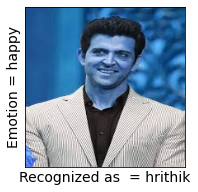

[6]
{'Aamir Khan': 0.014764413031268306, 'Ajay Devgan': 0.02283209586217172, 'Akshay': 0.03901375546615868, 'Amitabh': 0.02179915786764953, 'Anjelina Jolie': 0.010100920928924633, 'Arjun Rampal': 0.03118623779770723, 'Ayushman': 0.02020211647528579, 'Ben Affleck': 0.013150070826926806, 'Brad Pitt': 0.008855719391965994, 'Chris Evans': 0.012492905495186297, 'Chris Hemsworth': 0.016339668613133913, 'Disha Patani': 0.007881699821888724, 'Elton John': 0.02364379115106272, 'Emilia Clarke': 0.00998822711322627, 'Hrithik Roshan': 0.05353268685245485, 'Irrfan Khan': 0.024853646133342917, 'Jacqueline Fernandis': 0.00399846583565044, 'Jerry Seinfeld': 0.029841363294572355, 'John Abraham': 0.01404700353412753, 'Justin': 0.009928223913819867, 'Kajol': 0.006387470764395605, 'Kareena': 0.013896225323402856, 'Karishma': 0.011425813611421825, 'Katrina': 0.02224851103266866, 'Keanu Reeves': 0.015216895520111996, 'Kit Harrington': 0.011538016907813147, 'Madhuri': 0.008357081908888455, 'Madonna': 0.01675

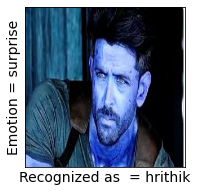

[6]
{'Aamir Khan': 0.0142515836131411, 'Ajay Devgan': 0.029277941786007042, 'Akshay': 0.024614839221200585, 'Amitabh': 0.039846117476760236, 'Anjelina Jolie': 0.010827199956510734, 'Arjun Rampal': 0.021233690375377874, 'Ayushman': 0.019047005780803736, 'Ben Affleck': 0.012943647312666968, 'Brad Pitt': 0.013421985123108203, 'Chris Evans': 0.008046580404490336, 'Chris Hemsworth': 0.011910248898722777, 'Disha Patani': 0.012892251558592829, 'Elton John': 0.04545228923211126, 'Emilia Clarke': 0.015200152619882668, 'Hrithik Roshan': 0.022048153904503678, 'Irrfan Khan': 0.0181746526158124, 'Jacqueline Fernandis': 0.009814825161463958, 'Jerry Seinfeld': 0.02461653574910803, 'John Abraham': 0.009645129340208313, 'Justin': 0.00727233340452147, 'Kajol': 0.011778574587201288, 'Kareena': 0.019599548418438542, 'Karishma': 0.01698232448895932, 'Katrina': 0.025082869005360175, 'Keanu Reeves': 0.020414877802549258, 'Kit Harrington': 0.015046136472670932, 'Madhuri': 0.009181839902923632, 'Madonna': 0.01

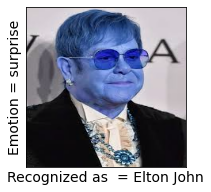

[0]
{'Aamir Khan': 0.022685952742119944, 'Ajay Devgan': 0.13271827381292226, 'Akshay': 0.016073355307739314, 'Amitabh': 0.01982736248816228, 'Anjelina Jolie': 0.00604291652584257, 'Arjun Rampal': 0.026043693492248058, 'Ayushman': 0.018203950324449547, 'Ben Affleck': 0.005500967497693415, 'Brad Pitt': 0.0069601710890254374, 'Chris Evans': 0.004597594984132128, 'Chris Hemsworth': 0.005953349896646614, 'Disha Patani': 0.00758526494100898, 'Elton John': 0.026159247394267716, 'Emilia Clarke': 0.007883295408774828, 'Hrithik Roshan': 0.017622742193441118, 'Irrfan Khan': 0.04218272441199386, 'Jacqueline Fernandis': 0.003701898212010369, 'Jerry Seinfeld': 0.016281674311073066, 'John Abraham': 0.014987132208330414, 'Justin': 0.005895490155785415, 'Kajol': 0.010429148314694919, 'Kareena': 0.010913925945120211, 'Karishma': 0.009320186082841566, 'Katrina': 0.012752154824834277, 'Keanu Reeves': 0.01296473530446679, 'Kit Harrington': 0.007286250636683928, 'Madhuri': 0.007993260755566937, 'Madonna': 0

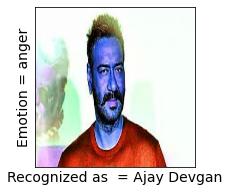

[4]
{'Aamir Khan': 0.008530877930476837, 'Ajay Devgan': 0.010670599490865228, 'Akshay': 0.009552197283614285, 'Amitabh': 0.016333637793218954, 'Anjelina Jolie': 0.01836316663584185, 'Arjun Rampal': 0.007721386289377115, 'Ayushman': 0.011087533972029882, 'Ben Affleck': 0.004375043353793157, 'Brad Pitt': 0.004445849493346997, 'Chris Evans': 0.004270409821691511, 'Chris Hemsworth': 0.004638251094601716, 'Disha Patani': 0.044294658480734994, 'Elton John': 0.012886139254583642, 'Emilia Clarke': 0.015876022473181057, 'Hrithik Roshan': 0.010635614995686457, 'Irrfan Khan': 0.01730693995772591, 'Jacqueline Fernandis': 0.008099145136228574, 'Jerry Seinfeld': 0.007860199734327654, 'John Abraham': 0.010773720811466377, 'Justin': 0.0076891286760085295, 'Kajol': 0.011560959825563726, 'Kareena': 0.04231283103574896, 'Karishma': 0.035470134688323364, 'Katrina': 0.036796754922366615, 'Keanu Reeves': 0.01008714987515104, 'Kit Harrington': 0.01010181870149096, 'Madhuri': 0.24120395812968082, 'Madonna': 0

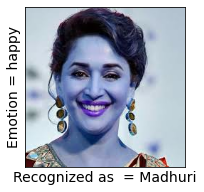

[6]
{'Aamir Khan': 0.005897833310590519, 'Ajay Devgan': 0.01577768796618414, 'Akshay': 0.02730651781297507, 'Amitabh': 0.011925930621370994, 'Anjelina Jolie': 0.008826587475870147, 'Arjun Rampal': 0.024882165626331425, 'Ayushman': 0.018388656639518948, 'Ben Affleck': 0.039380508075029755, 'Brad Pitt': 0.006775139772707566, 'Chris Evans': 0.20781996919388335, 'Chris Hemsworth': 0.023441020843494396, 'Disha Patani': 0.008675998538042894, 'Elton John': 0.026780499545546413, 'Emilia Clarke': 0.011560840442684607, 'Hrithik Roshan': 0.033924890592927116, 'Irrfan Khan': 0.02287090964955305, 'Jacqueline Fernandis': 0.007400557933739156, 'Jerry Seinfeld': 0.029260439713380812, 'John Abraham': 0.013973284472808807, 'Justin': 0.01237040485386641, 'Kajol': 0.005516237684012119, 'Kareena': 0.00805484777983015, 'Karishma': 0.009237561572642213, 'Katrina': 0.018926941347340534, 'Keanu Reeves': 0.018156953873636906, 'Kit Harrington': 0.009848350060735792, 'Madhuri': 0.006002355281341667, 'Madonna': 0.

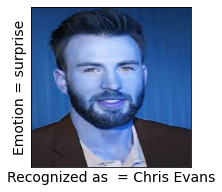

[6]
{'Aamir Khan': 0.006245707893778158, 'Ajay Devgan': 0.02539723292465863, 'Akshay': 0.02917691578529905, 'Amitabh': 0.01048180863049372, 'Anjelina Jolie': 0.006719069278556201, 'Arjun Rampal': 0.03455330808220683, 'Ayushman': 0.01474126659181041, 'Ben Affleck': 0.012270629485281258, 'Brad Pitt': 0.026888238731069956, 'Chris Evans': 0.01746467062129435, 'Chris Hemsworth': 0.14831559342057332, 'Disha Patani': 0.006285443322157262, 'Elton John': 0.03859382710039696, 'Emilia Clarke': 0.009463767915215292, 'Hrithik Roshan': 0.03017443731361934, 'Irrfan Khan': 0.02162300622927676, 'Jacqueline Fernandis': 0.006890745424404353, 'Jerry Seinfeld': 0.02332421177603977, 'John Abraham': 0.012839046157454634, 'Justin': 0.006352015869257375, 'Kajol': 0.00927055643777082, 'Kareena': 0.007765826644916825, 'Karishma': 0.0076965302983990095, 'Katrina': 0.013806121064079076, 'Keanu Reeves': 0.020664218363365766, 'Kit Harrington': 0.01746547466513569, 'Madhuri': 0.0055035653690022465, 'Madonna': 0.00817

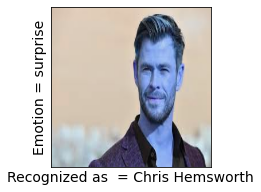

[6]
{'Aamir Khan': 0.036419177438042925, 'Ajay Devgan': 0.03874560169378435, 'Akshay': 0.023436614265118068, 'Amitabh': 0.021066069431031745, 'Anjelina Jolie': 0.009842828544692666, 'Arjun Rampal': 0.02496938226847922, 'Ayushman': 0.022777668311314177, 'Ben Affleck': 0.006217438788798403, 'Brad Pitt': 0.0038860422525102637, 'Chris Evans': 0.006600780716567733, 'Chris Hemsworth': 0.004284741309347203, 'Disha Patani': 0.00808244798936954, 'Elton John': 0.02297070557036344, 'Emilia Clarke': 0.0074640692707222955, 'Hrithik Roshan': 0.022862853455016943, 'Irrfan Khan': 0.055297958409876384, 'Jacqueline Fernandis': 0.005058330690725355, 'Jerry Seinfeld': 0.017508661719894122, 'John Abraham': 0.022953470683882274, 'Justin': 0.008458888214495305, 'Kajol': 0.00847339261603536, 'Kareena': 0.009537317630522735, 'Karishma': 0.006266997941225393, 'Katrina': 0.014919345864235666, 'Keanu Reeves': 0.008083872503112394, 'Kit Harrington': 0.007257917201220114, 'Madhuri': 0.011261777500403549, 'Madonna':

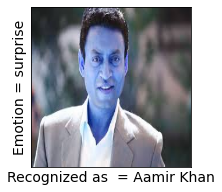

[5]
{'Aamir Khan': 0.1881296211670113, 'Ajay Devgan': 0.05202162649205813, 'Akshay': 0.016831717060781338, 'Amitabh': 0.023005313999465413, 'Anjelina Jolie': 0.00971501208068681, 'Arjun Rampal': 0.018852219029520903, 'Ayushman': 0.02698661225487221, 'Ben Affleck': 0.0067331999125571996, 'Brad Pitt': 0.004258904027728548, 'Chris Evans': 0.0035448332547414305, 'Chris Hemsworth': 0.0033144872295853005, 'Disha Patani': 0.013189392145511377, 'Elton John': 0.01852270403202494, 'Emilia Clarke': 0.0075259069280934985, 'Hrithik Roshan': 0.014007538102112436, 'Irrfan Khan': 0.02586549940374293, 'Jacqueline Fernandis': 0.0044185575420622285, 'Jerry Seinfeld': 0.011213958365161168, 'John Abraham': 0.020881765149817773, 'Justin': 0.007035850708967041, 'Kajol': 0.008086321240085004, 'Kareena': 0.016397880457256493, 'Karishma': 0.013462077466635297, 'Katrina': 0.0187871386306916, 'Keanu Reeves': 0.011637157839256384, 'Kit Harrington': 0.0085674363747485, 'Madhuri': 0.010259727753418811, 'Madonna': 0.

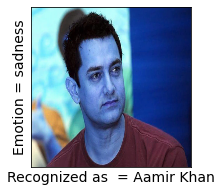

[6]
{'Aamir Khan': 0.013144939167179097, 'Ajay Devgan': 0.01772462166725368, 'Akshay': 0.021224070091071082, 'Amitabh': 0.011819438043813548, 'Anjelina Jolie': 0.009921763859894512, 'Arjun Rampal': 0.020993229338820814, 'Ayushman': 0.01087061719822946, 'Ben Affleck': 0.35775601915905014, 'Brad Pitt': 0.006834786998039915, 'Chris Evans': 0.012743794751597993, 'Chris Hemsworth': 0.00574805188150089, 'Disha Patani': 0.004014014276876535, 'Elton John': 0.02038738977559885, 'Emilia Clarke': 0.00520833118970597, 'Hrithik Roshan': 0.022366711405971202, 'Irrfan Khan': 0.020190914026486272, 'Jacqueline Fernandis': 0.0040201050927847525, 'Jerry Seinfeld': 0.020998545414336153, 'John Abraham': 0.01834096472342765, 'Justin': 0.011250120479806936, 'Kajol': 0.0036912015777453367, 'Kareena': 0.003996033485985305, 'Karishma': 0.004676178373476757, 'Katrina': 0.011497513493546446, 'Keanu Reeves': 0.03272653309168005, 'Kit Harrington': 0.011581465247645688, 'Madhuri': 0.00483616753197066, 'Madonna': 0.0

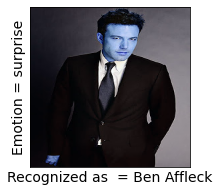

[2]
{'Aamir Khan': 0.016324318023236715, 'Ajay Devgan': 0.04302749233848741, 'Akshay': 0.012391380744393192, 'Amitabh': 0.023062618323710024, 'Anjelina Jolie': 0.009260428303135318, 'Arjun Rampal': 0.014169644092008344, 'Ayushman': 0.027788525084434208, 'Ben Affleck': 0.006820665051749027, 'Brad Pitt': 0.0063488279955044545, 'Chris Evans': 0.0040784810739204445, 'Chris Hemsworth': 0.004732129672337454, 'Disha Patani': 0.021829996624014716, 'Elton John': 0.02803278789318393, 'Emilia Clarke': 0.01100676749836704, 'Hrithik Roshan': 0.013312255859176192, 'Irrfan Khan': 0.030445160505022256, 'Jacqueline Fernandis': 0.005660309272572117, 'Jerry Seinfeld': 0.01648500732807958, 'John Abraham': 0.016465278570117505, 'Justin': 0.009877797875279712, 'Kajol': 0.010401803745097514, 'Kareena': 0.02310449398035007, 'Karishma': 0.015601748919925823, 'Katrina': 0.018515709726455207, 'Keanu Reeves': 0.01243124126072191, 'Kit Harrington': 0.013828375603925068, 'Madhuri': 0.01174683259249157, 'Madonna': 0

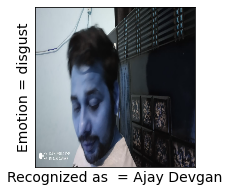

[0]
{'Aamir Khan': 0.02040765576432489, 'Ajay Devgan': 0.0428082065443709, 'Akshay': 0.014267203518037001, 'Amitabh': 0.03075037584902473, 'Anjelina Jolie': 0.008829277477612453, 'Arjun Rampal': 0.015262376499946346, 'Ayushman': 0.025675276410428216, 'Ben Affleck': 0.005592899381821093, 'Brad Pitt': 0.008386101669200275, 'Chris Evans': 0.00311372426643564, 'Chris Hemsworth': 0.0048785762197641564, 'Disha Patani': 0.014984586354922804, 'Elton John': 0.03379523651588163, 'Emilia Clarke': 0.008853067572875118, 'Hrithik Roshan': 0.014199163897245442, 'Irrfan Khan': 0.024657710145416678, 'Jacqueline Fernandis': 0.0072392728889747035, 'Jerry Seinfeld': 0.017340589074520678, 'John Abraham': 0.01751954982930301, 'Justin': 0.005942514619141372, 'Kajol': 0.01192899621377037, 'Kareena': 0.019355921149641648, 'Karishma': 0.012677164043392282, 'Katrina': 0.017438158772434324, 'Keanu Reeves': 0.01245315311284653, 'Kit Harrington': 0.016276657836438793, 'Madhuri': 0.00931452598486747, 'Madonna': 0.00

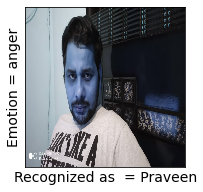

In [22]:


# Setting up variables and creating basic dataframes
import pandas as pd
test_label_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone Project/CP_Final/test_label_data.csv') 
employee_test = "/content/drive/My Drive/Colab Notebooks/Capstone Project/CP_Final/test/"
test_emp_name = []
final_names =[]

# Getting the model and loading it
# Emotion Detection Model
filename = '/content/drive/My Drive/Colab Notebooks/Capstone Project/CP_Final/Weights/finalized_model1.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Face Recognition Model
recog_model_file = '/content/drive/My Drive/Colab Notebooks/Capstone Project/CP_Final/Weights/face_recog.sav'
face_recog_model = pickle.load(open(recog_model_file, 'rb'))

for file in listdir(employee_test) :
  employee, extension = file.split(".")
  test_emp_name
  test_emp_name.append(employee)
    #print(employee, extension)
  if extension == 'jpeg' :
      #print(employee)
      #print(employee_test+'%s.jpeg' % (employee))
    testModel(employee_test+'%s.jpeg' % (employee))
  elif extension == 'jpg' :
      #print(employee_test+'%s.jpeg' % (employee))
    testModel(employee_test+'%s.jpg' % (employee))  
      #print(employee) 
  


In [0]:
test_emp_name = [x.upper() for x in test_emp_name] 
test_emp_name = [x.rstrip() for x in test_emp_name] 
test_emp_name = [x.lstrip() for x in test_emp_name] 
  
final_names = [x.upper() for x in final_names] 
final_names = [x.rstrip() for x in final_names] 
final_names = [x.lstrip() for x in final_names] 

In [0]:
# Created for accuracy  purpose. Test label and Label predicted.

y_data =pd.DataFrame(list(zip(test_emp_name,final_names)), columns =['filename', 'y_predict'])
result = pd.merge(left=test_label_data, right=y_data, left_on='Image_Name', right_on='filename') 

In [25]:
metrices_report()


[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Precision: 0.027778
Recall: 0.032407
F1 Score: 0.029762
                 precision    recall  f1-score   support

     AAMIR KHAN       0.00      0.00      0.00         1
    AJAY DEVGAN       0.25      0.33      0.29         3
         AKSHAY       0.25      0.25      0.25         4
        AMIT

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarnin